In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('california_housing_test.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [19]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [20]:
x = df.drop(columns='median_house_value')
y = df['median_house_value']

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("R2 score : ",r2_score)
print("mse : ",mse)
print("mae : ",mean_absolute_error(y_test,y_pred))

R2 score :  0.5075185127180688
mse :  6202077526.04
mae :  52287.706666666665


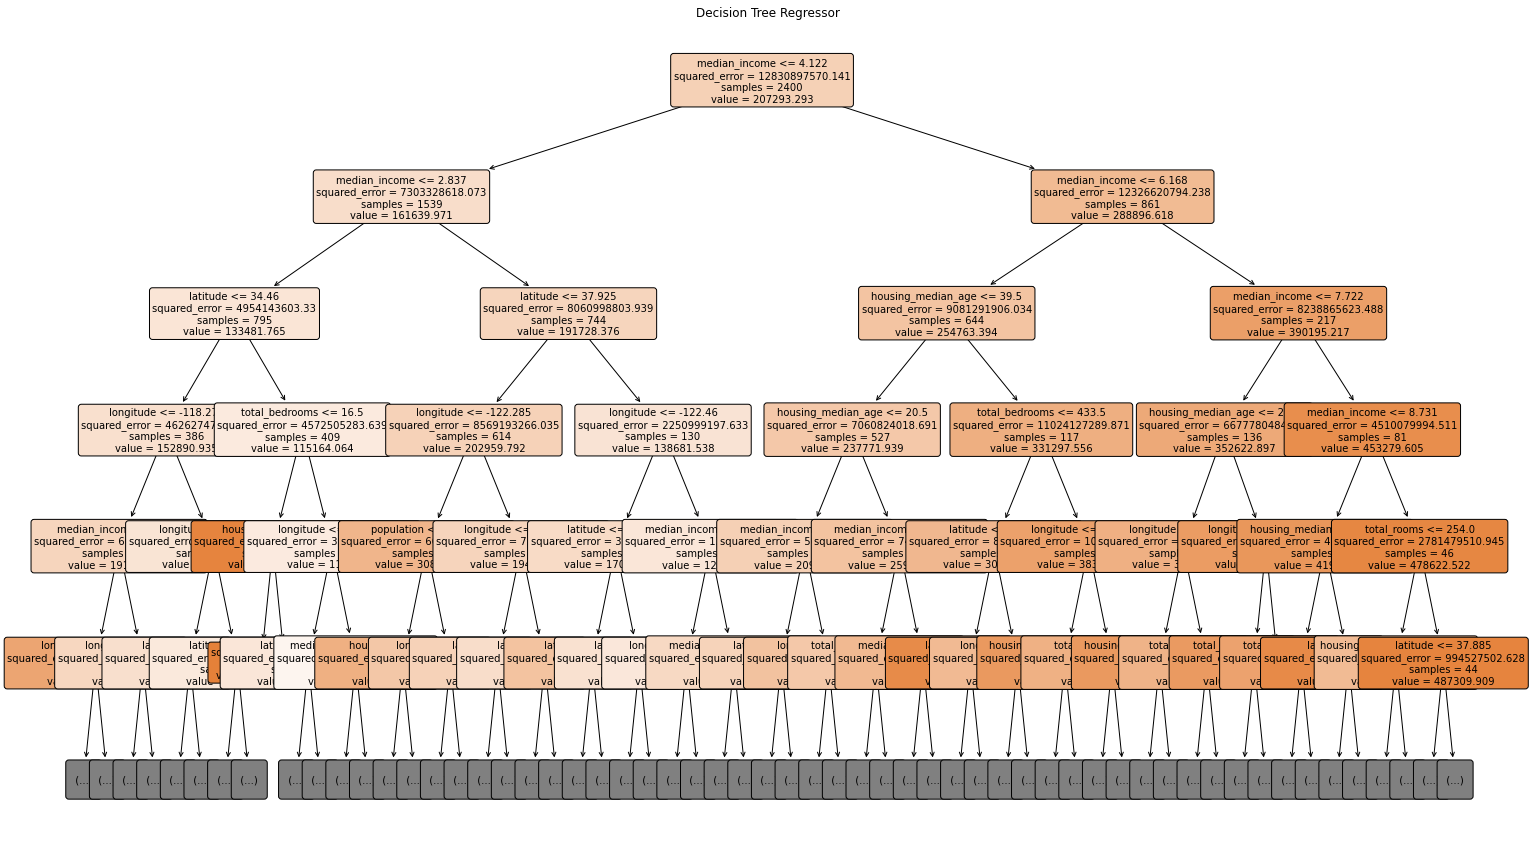

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))
tree.plot_tree(
    dtr,
    feature_names=x.columns,
    filled=True,
    rounded=True,
    max_depth=5,   
    fontsize=10
)
plt.title("Decision Tree Regressor ")
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("classfication Report :\n ",classification_report(y_test,y_pred))


Accuracy :  0.021666666666666667
Confusion Matrix : 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 12]]
classfication Report :
                precision    recall  f1-score   support

     22500.0       0.00      0.00      0.00         1
     40000.0       0.00      0.00      0.00         1
     41500.0       0.00      0.00      0.00         1
     42500.0       0.00      0.00      0.00         1
     43300.0       0.00      0.00      0.00         0
     44600.0       0.00      0.00      0.00         1
     46300.0       0.00      0.00      0.00         1
     46500.0       0.00      0.00      0.00         1
     47500.0       0.00      0.00      0.00         2
     49800.0       0.00      0.00      0.00         0
     50300.0       0.00      0.00      0.00         0
     50800.0       0.00      0.00      0.00         1
     51600.0       0.00      0.00      0.00         0
     525

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhi/opt/anaconda3/lib/

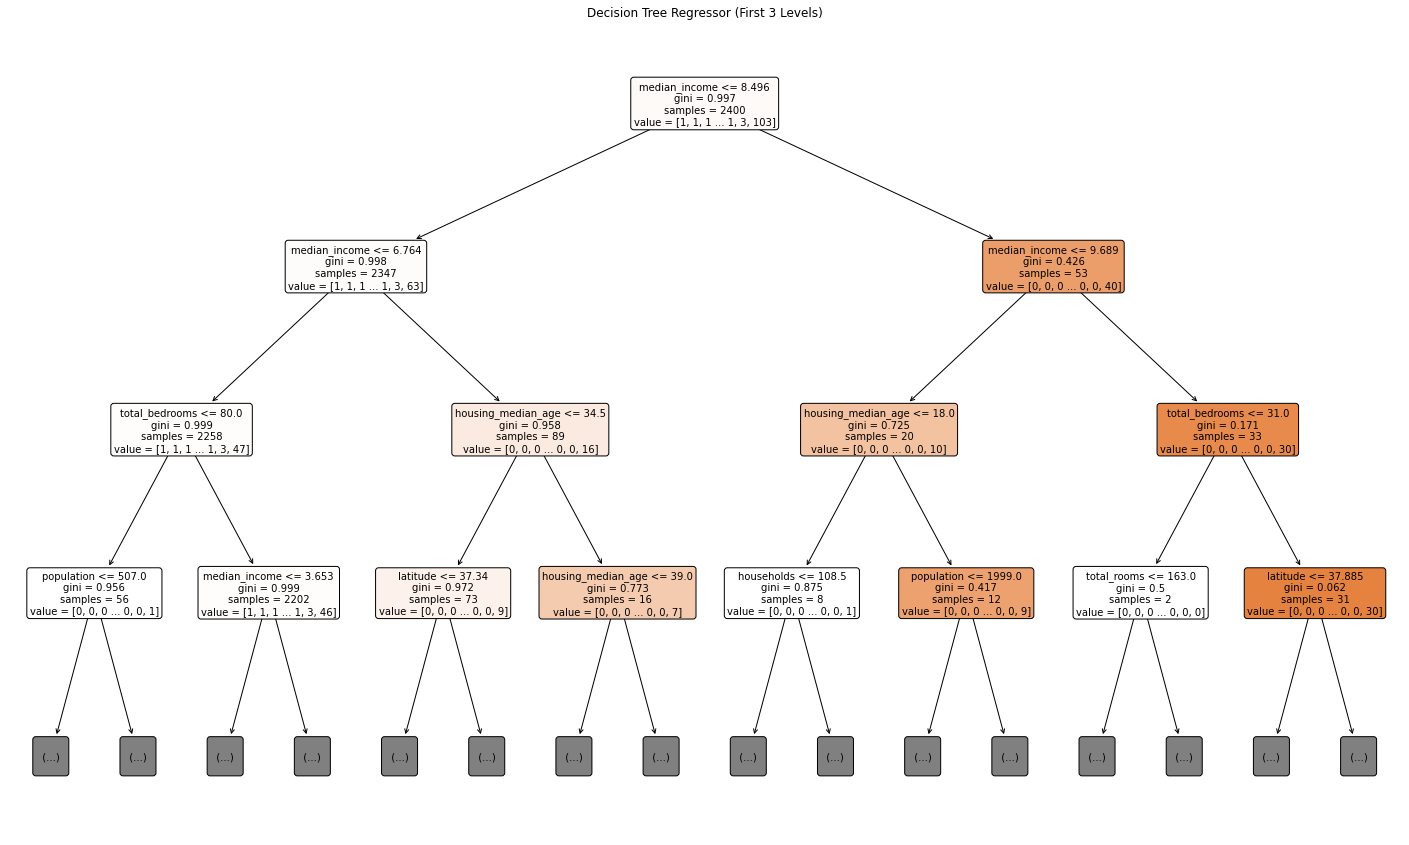

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))
tree.plot_tree(
    dtc,
    feature_names=x.columns,
    filled=True,
    rounded=True,
    max_depth=3,   
    fontsize=10
)
plt.title("Decision Tree Regressor (First 3 Levels)")
plt.show()

1. RMSE / R² score

RMSE measures the average prediction error; lower RMSE means better accuracy.
R² shows how much variance in the target is explained by the model.

2. Effect of increasing max_depth

Increasing max_depth makes the tree more complex and improves training accuracy.
Too much depth can cause overfitting.

3. Top features in the tree

Features like median_income appear at the top.
They provide maximum information gain for predicting house prices.

4. Overfitting or underfitting

If training performance is much better than testing, the model is overfitting.
If both are poor, the model is underfitting.